In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Leitura de Arquivos

In [184]:
placa = cv2.imread('placaFoco.jpg',0)

In [553]:
def show_fig(fig,h,w,title):
    plt.rcParams["figure.figsize"] = [h,w]
    plt.title(title)
    plt.imshow(fig,cmap = 'gray')
    plt.axis('off')
    plt.show()

## Aplicação de Filtros de Passa Alta

In [554]:
# Uso do filtro laplacian para encontrar gradientes na imagem
laplacian = cv2.Laplacian(placa,cv2.CV_64F)

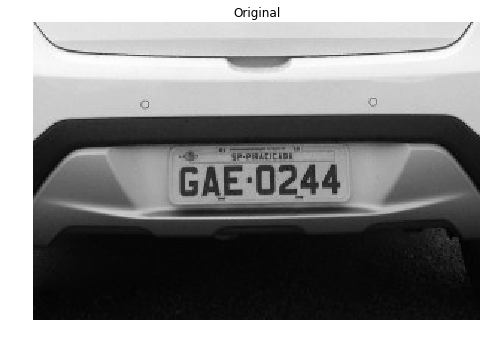

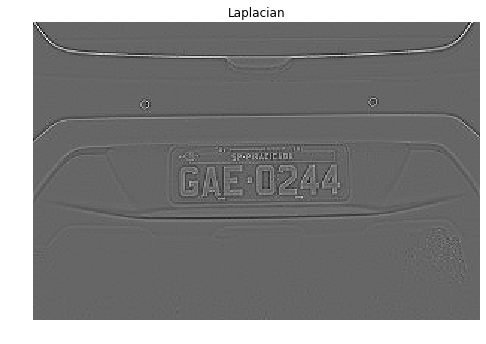

In [555]:
# Dimensões
h = 10
w = 10

# Mostrar e salvar a figura original e laplacian
show_fig(placa,8,15,'Original')
show_fig(laplacian,8,15,'Laplacian')

In [556]:
# Estrutura proporcional a da placa usada em todos os filtros de passa alta
morph = cv2.getStructuringElement(cv2.MORPH_RECT,(40,13))

## Laplacian

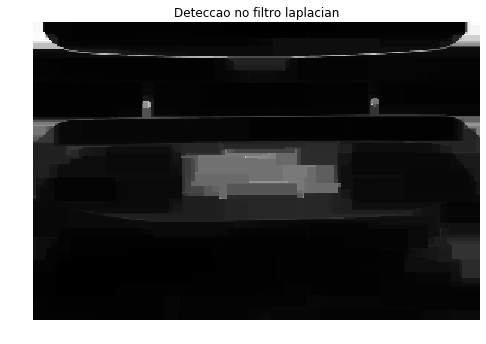

In [557]:
# Captura das regioes que possam conter a placa
region_plate = cv2.morphologyEx(laplacian,
                                cv2.MORPH_CLOSE,
                                morph,
                                iterations=1
                               )

# Mostrar o resultado
show_fig(region_plate,8,15,'Deteccao no filtro laplacian')

### Threshold para destacar melhor a placa

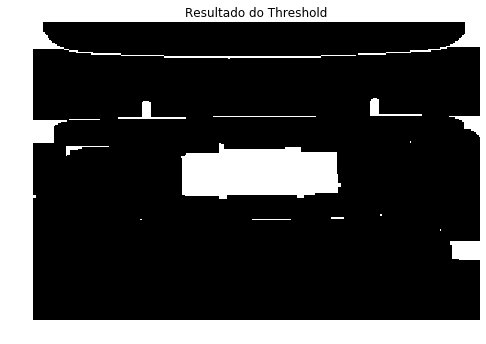

In [558]:
region_plate = cv2.convertScaleAbs(region_plate)
ret, region_plate = cv2.threshold(region_plate,69,255,cv2.THRESH_BINARY)
show_fig(region_plate,8,15,'Resultado do Threshold')

### Erosão seguida de dilatação para destacar somente a placa

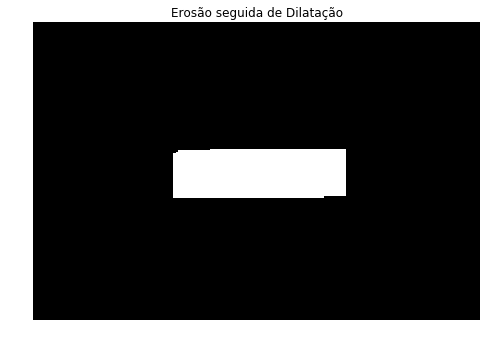

In [559]:
kernel = np.ones((3,7),np.uint8)
region_plate = cv2.morphologyEx(region_plate,
                                cv2.MORPH_OPEN,
                                kernel,
                                iterations=10
                               )
region_plate = cv2.dilate(region_plate,kernel,iterations=2)
show_fig(region_plate,8,15,'Erosão seguida de Dilatação')

### Encontrar e desenhar contornos na imagem original

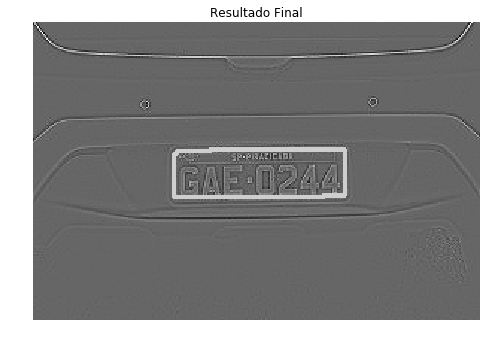

In [560]:
# Salvar Imagem Original
result = laplacian.copy()
# Encontrar contornos
contours, hierarchy = cv2.findContours(region_plate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# Desenhar contornos
result = cv2.drawContours(result,contours,-1,(255,255,255),2)
# Mostrar resultados
show_fig(result,8,15,'Resultado Final')